# Electricity Prediction

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
def wrangle(file_path, resample='1H'):
    # read CSV file
    df_first = pd.read_csv(file_path)

    # extract required columns
    df = df_first[['Date', 'Time', 'Global_active_power']].copy()
    df.rename(columns={'Global_active_power': 'Energy'}, inplace=True)

    # convert column to date time column
    df['Timestamp'] = pd.to_datetime(df['Date'] + " " + df['Time'])

    # set timestamp as index
    df = df.set_index('Timestamp')

    # convert 'Energy' column to float
    df["Energy"] = pd.to_numeric(df["Energy"], errors="coerce")

     # drop columns
    df.drop(columns=['Date', 'Time'], inplace=True)

    # foward fill NA values
    y = df['Energy'].resample(resample).mean().fillna(method='ffill')

    return y

In [106]:
y = wrangle('./household_power_consumption.csv')
y.head()

C:\Users\latun\AppData\Local\Temp\ipykernel_12496\2249038641.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Date'] + " " + df['Time'])
C:\Users\latun\AppData\Local\Temp\ipykernel_12496\2249038641.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  y = df['Energy'].resample(resample).mean().fillna(method='ffill')
C:\Users\latun\AppData\Local\Temp\ipykernel_12496\2249038641.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df['Energy'].resample(resample).mean().fillna(method='ffill')


Timestamp
2007-01-01 00:00:00    2.550633
2007-01-01 01:00:00    2.523400
2007-01-01 02:00:00    2.582333
2007-01-01 03:00:00    2.541667
2007-01-01 04:00:00    2.475733
Freq: h, Name: Energy, dtype: float64

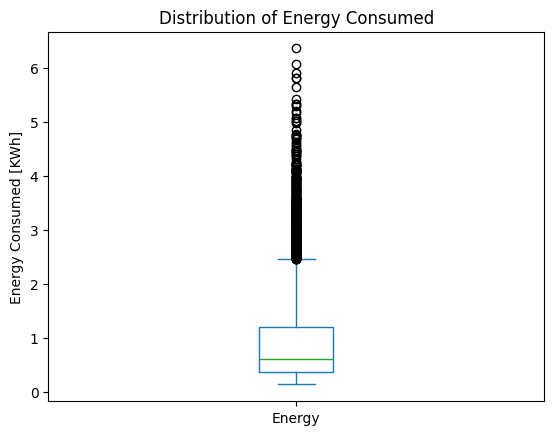

In [111]:
y.plot(kind='box')
plt.ylabel('Energy Consumed [KWh]')
plt.title('Distribution of Energy Consumed');

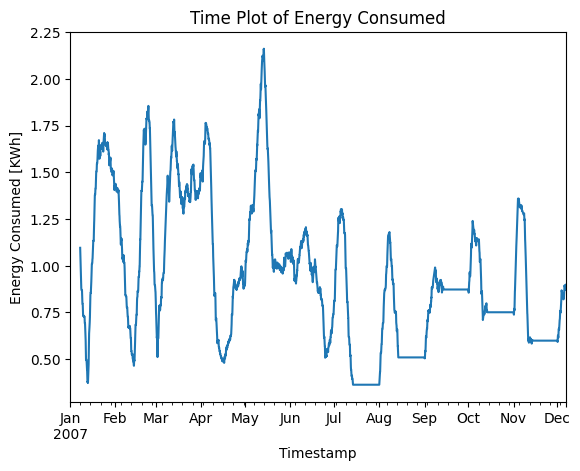

In [120]:
y.rolling(168).mean().plot()
plt.ylabel('Energy Consumed [KWh]')
plt.title('Time Plot of Energy Consumed');

The spike between May and June may be due to the fact that it is summer and more electronic devices may be used.